# Piecewise Linear Interpolation

Assume that $x(1:n)$ and $y(1:n)$ are given where $\alpha = x_1 < \cdots < x_n = \beta$ and $y_i = f(x_i)$, $i = 1:n$. If you connect the dots $(x_1, y_1), \cdots, (x_n, y_n)$ with straight lines, the the graph of a piecewise linear function is displayed.

The piecewise linear interpolant is build upon the local linear interpolants

$$
L_i(z) = y_i + \frac{y_{i+1} - y_i}{x_{i+1} - x_i}(z - x_i)
$$

Note that $L_i(z)$ is just the linear interpolant of $f$ at the points $x = x_i$ and $x = x_i+1$. We then define:

$$
L(z) = \begin{cases}
L_1(z) & x_1 \le z \le x_2 \\
L_2(z) & x_2 \le z \le x_3 \\
\vdots & \vdots \\
L_{n-1}(z) & x_{n-1} \le z \le x_n
\end{cases}
$$

The act of setting up $L$ is the act of solving each of the local linear interpolation problems. The $n-1$ divided differences $b_1, \cdots, b_{n-1}$ can obviously be computed by a loop.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def f(n):
    return 1/(1 + n**2)

In [4]:
def getPoints(f, p, r):
    """
    Gets 'order' evenly-spaced points within the given range.
    Runs it through function f to return 2D array with [xi, yi].

    f - function to return [xi, yi] inside 'data' return.
    p - amount of points to retrieve within given function.
    r - range to retrieve points by; (i.e. [-5, 5])

    Returns:
        x - (list) x coordinates of the points.
        y - (list) y coordinates of the points.
        xy - (list(list)) [x,y] coordinates of the points.
    """
    points = np.linspace(r[0], r[1], num = p).tolist()
    x = []
    y = []
    xy = []
    for i in points:
        x.append(i)
        y.append(f(i))
        xy.append([i, f(i)])

    return x, y, xy

In [5]:
def LinearPiecewise(f, o, r):
    """ Linear Piecewise Interpolation

    f - function.
    o - order of interpolation.
    r - range of points.
    
    Returns:
            xyp - [x, y] data points of evenly spaced ponts between 'range'.
            xy - [x, y] data points of the ACTUAL given function (10,000 points).
            xyf - [x, y] data points of function generated with Lagrange.
    """
    def L(u, x, y):
        """ L(x) for Linear Piecewise, given a specific x point & finding y from data.
        
        u - unknwon value to find.
        x - x data points of function output.
        y - y data points of function output.
        
        Order is kept in check by logic (x_n, x_n) == (x_len(x), y_len(x))
        
        Return: Estimated y point.
        """
        for i in range(len(x)-1 or len(y)-1):
            if x[i] <= u < x[i+1]:
                return y[i] + ((y[i+1]-y[i])/(x[i+1] - x[i])) * (u - x[i])

    
    # X, Y for points.
    xp, yp, _ = getPoints(f, o, [-5, 5]) # Generated Points
    x, y, _ = getPoints(f, 10000, [-5, 5]) # Actual Function Point
    
    # X, Y for interpolated function.
    xf = []
    yf = []
    for i in range(len(x)-1 or len(y)-1):
        xf.append(x[i])
        yf.append(L(x[i], xp, yp))
        
    xyp = [xp, yp]
    xy = [x, y]
    xyf = [xf, yf]
    
    return xy, xyf, xyp

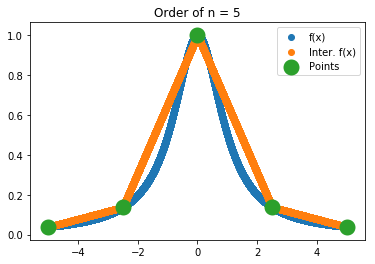

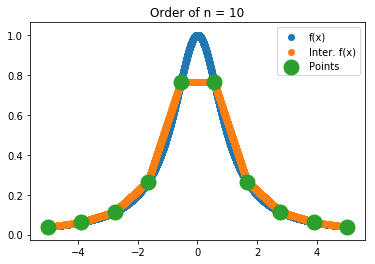

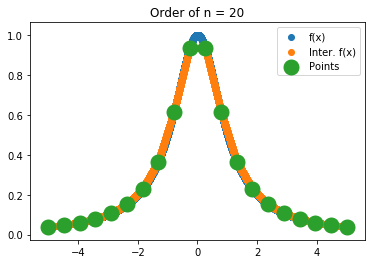

In [6]:
orders = [5, 10, 20]
for o in orders:
    xy, xyf, xyp = LinearPiecewise(f, o, [-5, 5])
    a = plt.scatter(xy[0], xy[1], linewidth=1) # actual function.
    i = plt.scatter(xyf[0], xyf[1], linewidth=1) # interpolated function.
    p = plt.scatter(xyp[0], xyp[1], linewidth=10) # points.
    plt.title(f'Order of n = {o}')
    plt.legend((a, i, p), ('f(x)', 'Inter. f(x)', 'Points'))
    plt.show()